In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
bcn_orginal = pd.read_csv('../data/listings_bcn.csv')

In [9]:
bcn_orginal.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13977576,https://www.airbnb.com/rooms/13977576,20230314070701,2023-03-14,previous scrape,Habitación individual es Barcelona,Mi alojamiento es bueno para aventureros y via...,NaN,https://a0.muscache.com/pictures/7a6e9767-bd4e...,64903899,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01
1,42105584,https://www.airbnb.com/rooms/42105584,20230314070701,2023-03-14,previous scrape,Habitación M&D,<b>License number</b><br />Exempt,NaN,https://a0.muscache.com/pictures/7342e586-6ea5...,333969184,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN
2,33727898,https://www.airbnb.com/rooms/33727898,20230314070701,2023-03-14,city scrape,Spacious and bright apartment next to Plaza Es...,Hi friends! Welcome to this apartment located ...,The apartment is located in the Eixample quart...,https://a0.muscache.com/pictures/44066458-5997...,251710733,...,5.00,4.83,4.73,HUTB-008684,f,4,4,0,0,0.63
3,44995311,https://www.airbnb.com/rooms/44995311,20230314070701,2023-03-14,city scrape,"Single Room, City Center, Private Bathroom",Goya Hostel is a hostel located in the center ...,"The Eixample, which translates as ""widening"" b...",https://a0.muscache.com/pictures/af651bc2-8dff...,363074093,...,4.64,4.91,4.73,HUTB-265656,t,7,1,6,0,0.69
4,15763812,https://www.airbnb.com/rooms/15763812,20230314070701,2023-03-14,city scrape,HABITACIÓN PLAZA ESPAÑA,"Lugares de interés: Poble Espanyol, CaixaForum...",NaN,https://a0.muscache.com/pictures/1bccbbbc-4b78...,101927904,...,4.67,4.88,4.60,Exempt,t,1,0,1,0,0.93


In [10]:
bcn_orginal.shape

(15655, 75)

In [11]:
bcn_orginal.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [15]:
bcn = bcn_orginal.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'description', 'neighborhood_overview', 'picture_url','host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', ], axis=1)

In [13]:
bcn_orginal['host_id'].nunique()

6227

In [14]:
bcn_orginal['host_name'].nunique()

3076

In [16]:
bcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15655 entries, 0 to 15654
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15655 non-null  int64  
 1   name                                          15646 non-null  object 
 2   host_id                                       15655 non-null  int64  
 3   host_url                                      15655 non-null  object 
 4   host_name                                     15653 non-null  object 
 5   host_since                                    15653 non-null  object 
 6   host_response_time                            12660 non-null  object 
 7   host_response_rate                            12660 non-null  object 
 8   host_acceptance_rate                          13127 non-null  object 
 9   host_is_superhost                             15653 non-null 

In [8]:
duplicateRows = bcn[bcn.duplicated()]
duplicateRows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [17]:
bcn.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.565500e+04,1.565500e+04,15653.000000,15653.000000,15655.000000,15655.000000,15655.000000,0.0,15098.000000,15378.000000,...,12089.000000,12084.000000,12090.000000,12084.000000,12085.000000,15655.000000,15655.000000,15655.000000,15655.000000,12176.000000
mean,1.823385e+17,1.450517e+08,33.219575,47.700569,41.391943,2.167214,3.484510,NaN,1.758511,2.443101,...,4.581542,4.709420,4.709391,4.747661,4.467860,24.163462,21.142510,2.856404,0.084063,1.299759
std,3.126641e+17,1.555632e+08,75.886992,122.550600,0.013936,0.017259,2.172102,NaN,1.051358,1.862454,...,0.518338,0.456223,0.467022,0.371416,0.537626,46.168220,45.881018,11.617766,0.789422,1.747771
min,1.867400e+04,3.073000e+03,1.000000,1.000000,41.352608,2.091590,0.000000,NaN,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.891816e+07,9.171437e+06,1.000000,2.000000,41.381040,2.157340,2.000000,NaN,1.000000,1.000000,...,4.440000,4.640000,4.630000,4.670000,4.310000,1.000000,0.000000,0.000000,0.000000,0.210000
50%,3.864140e+07,7.067177e+07,6.000000,8.000000,41.389740,2.168246,3.000000,NaN,1.000000,2.000000,...,4.720000,4.850000,4.850000,4.850000,4.580000,5.000000,2.000000,0.000000,0.000000,0.770000
75%,5.563748e+17,2.651478e+08,28.000000,39.000000,41.401295,2.177460,4.000000,NaN,2.000000,3.000000,...,4.920000,5.000000,5.000000,5.000000,4.790000,23.000000,19.000000,1.000000,0.000000,1.900000
max,8.462300e+17,5.049885e+08,1817.000000,3639.000000,41.459560,2.227710,16.000000,NaN,20.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,241.000000,241.000000,120.000000,12.000000,47.160000


In [18]:
bcn.isnull().sum()

id                                                 0
name                                               9
host_id                                            0
host_url                                           0
host_name                                          2
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3479
Length: 63, dtype: int64

In [19]:
bcn['neighbourhood_cleansed'].unique()

array(['Hostafrancs', 'la Prosperitat', 'Sant Antoni',
       "la Dreta de l'Eixample", 'el Poble Sec', 'el Poblenou',
       "l'Antiga Esquerra de l'Eixample", 'el Raval',
       "el Camp de l'Arpa del Clot", 'Navas', 'la Vila de Gràcia',
       'el Baix Guinardó', "la Nova Esquerra de l'Eixample", 'les Corts',
       'Sant Gervasi - Galvany', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Barri Gòtic',
       'el Putxet i el Farró', 'el Fort Pienc', 'la Sagrada Família',
       'Sants - Badal', 'el Parc i la Llacuna del Poblenou',
       'les Tres Torres', 'Sants', 'el Guinardó',
       'Vilapicina i la Torre Llobeta', 'Pedralbes',
       'Sant Martí de Provençals', "el Camp d'en Grassot i Gràcia Nova",
       'Sarrià', 'la Vila Olímpica del Poblenou', 'Can Baró',
       'la Teixonera', 'la Salut', 'Horta', 'la Marina del Prat Vermell',
       'Sant Genís dels Agudells', 'el Carmel',
       'Diagonal Mar i el Front Marítim del Poblenou', 'la Bordeta',
       'S

In [23]:
bcn['neighbourhood_group_cleansed'].value_counts(normalize=True).sort_values(ascending=False)

neighbourhood_group_cleansed
Eixample               0.363526
Ciutat Vella           0.235516
Sants-Montjuïc         0.102012
Sant Martí             0.091408
Gràcia                 0.090003
Sarrià-Sant Gervasi    0.045353
Horta-Guinardó         0.028234
Les Corts              0.019994
Sant Andreu            0.012264
Nou Barris             0.011690
Name: proportion, dtype: float64

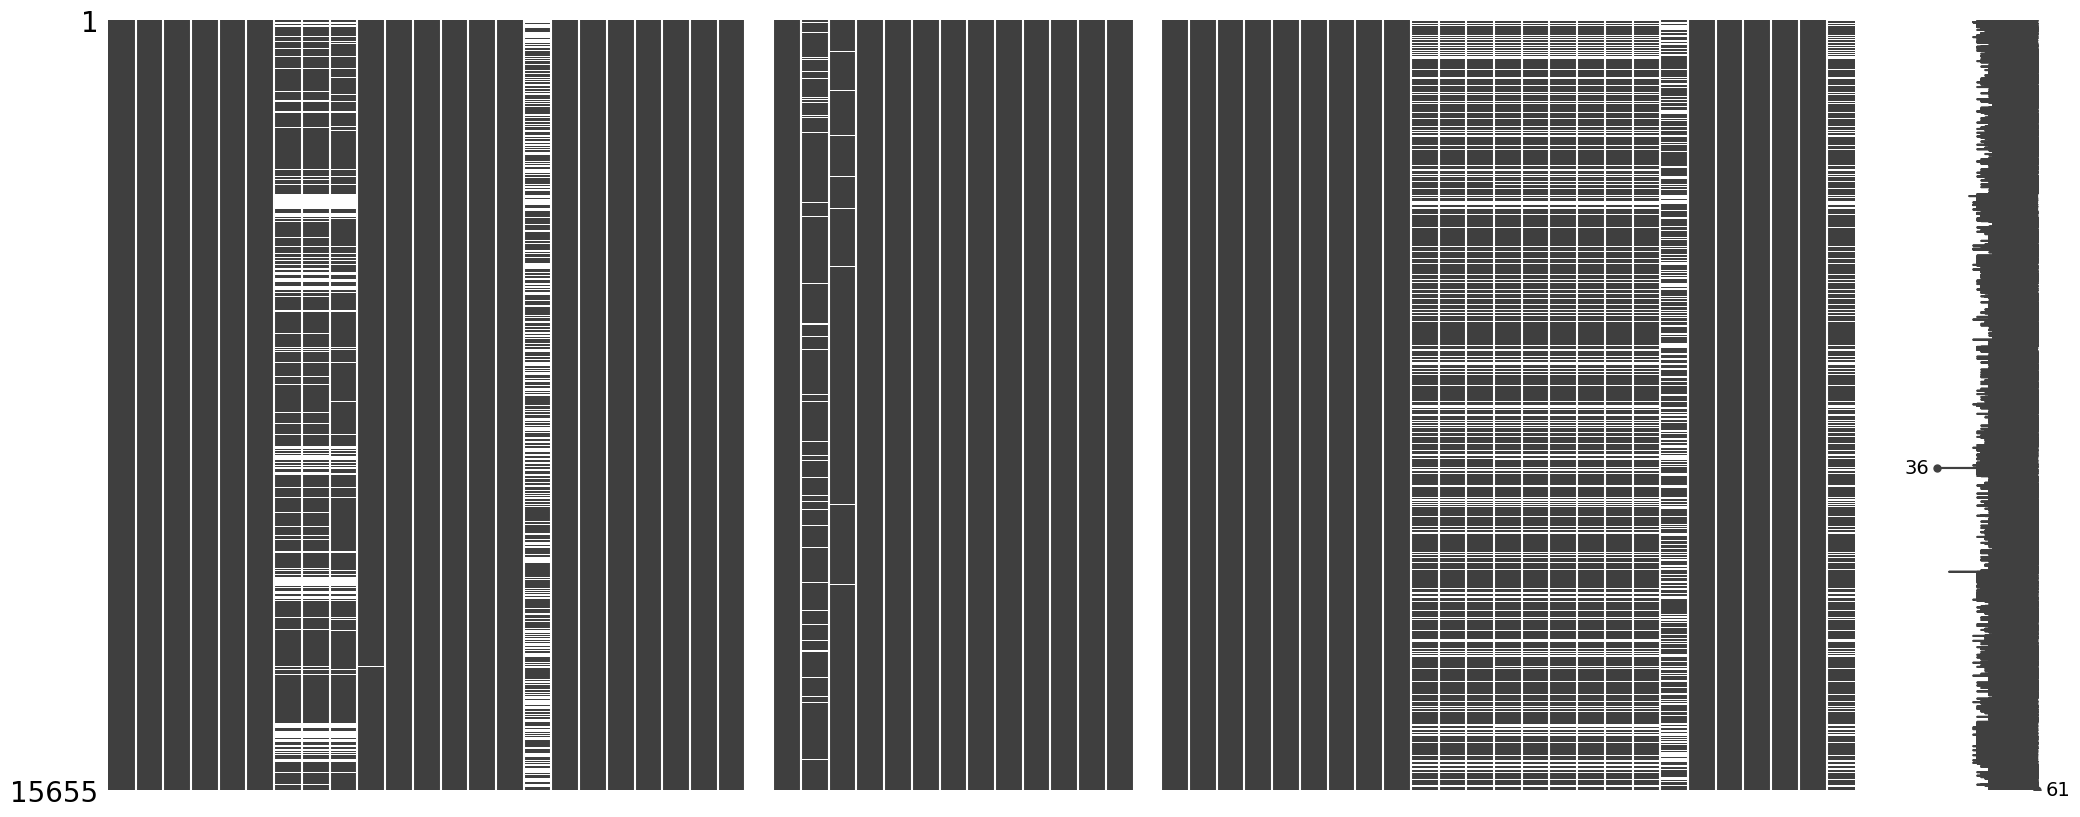

In [21]:
import missingno as msno
msno.matrix(bcn);